In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data
y = data.target

In [42]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(activation='tanh', solver='adam', max_iter=10000, 
                    hidden_layer_sizes=(20,10), learning_rate_init= 0.001, )

parameter_space = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

print("Best alpha: %s, Best LR: %s" % (clf.best_estimator_.alpha, clf.best_estimator_.learning_rate))

/home/mario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best alpha: 0.0001, Best LR: adaptive


In [43]:
from sklearn.model_selection import RepeatedKFold

scores = []

rkf = RepeatedKFold(n_splits=5, n_repeats=2)
for train, test in rkf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    nn = clf.best_estimator_
    nn.fit(X_train, y_train)
    scores.append((nn.score(X_test, y_test)))
    
scores = np.array(scores)
    
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.08)


In [44]:
from sklearn.model_selection import cross_val_score

nn = clf.best_estimator_
scores = cross_val_score(nn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.03)


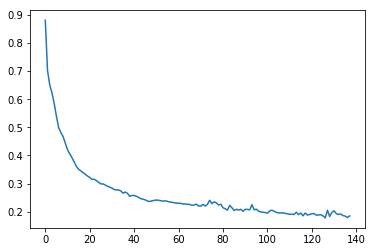

In [45]:
import matplotlib.pyplot as plt

plt.plot(nn.loss_curve_)
plt.show()